In [112]:
import torch
import os
import matplotlib.pyplot as plt
tensor = torch.load('./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/ns2d_cond_pda/save/test_999_batch_6.pt')
print(tensor.keys())
print(tensor['ground_truth'].shape, tensor['prediction'].shape)
seed = torch.randint(0 ,tensor['ground_truth'].shape[0] , (1,)).item()
# !pip install ipykernel -i https://pypi.mirrors.ustc.edu.cn/simple/ 
pred = tensor['prediction']
yy = tensor['ground_truth']

pred ,yy = pred[  seed   ,:,:,:,:].cpu(), yy[  seed   ,:,:,:,:].cpu()
            # Get the number of time steps and channels
_, _, num_time, num_channels = pred.shape

dict_keys(['ground_truth', 'prediction'])
torch.Size([20, 128, 128, 46, 3]) torch.Size([20, 128, 128, 46, 3])


/tmp/ipykernel_2695553/3761661667.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


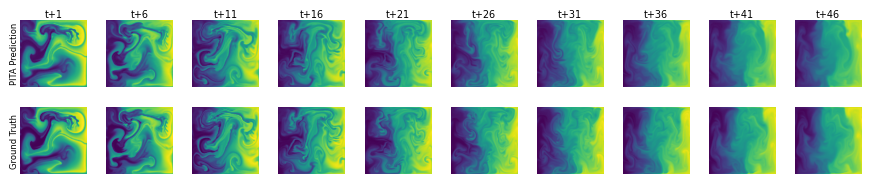

In [113]:
# Downsample timesteps by taking every 5th timestep
cmap_list = ["magma", "viridis", "plasma"]
cmap = cmap_list[1]
timestep_indices = list(range(0, 46, 5))  # Assuming timesteps are 1-indexed
downsampled_pred = pred[:, :, timestep_indices, :]
downsampled_yy = yy[:, :, timestep_indices, :]

# Total number of images and rows/cols
num_channels = downsampled_pred.shape[-1]  # Number of channels
num_images = len(timestep_indices)  # Total images after downsampling
images_per_row = 10  # Number of images per row
num_rows = (num_images + images_per_row - 1) // images_per_row * 2  # Rows for predictions and ground truths

# Create figure
fig, axes = plt.subplots(
    num_rows, images_per_row,
    figsize=(images_per_row * 1.1, num_rows),
    gridspec_kw={"wspace": 0.1, "hspace": 0.3}
)

# Plot images
image_idx = 0

for row in range(0, num_rows, 2):  # Every pair of rows is for one channel
    for col in range(images_per_row):
        if image_idx >= num_images:
            # Hide unused axes
            axes[row, col].axis('off')
            axes[row + 1, col].axis('off')
            continue

        # Plot prediction in the upper row
        ax_pred = axes[row, col]
        im_pred = ax_pred.imshow(downsampled_pred[:, :, image_idx, 0], cmap=cmap)
        ax_pred.axis('on')
        ax_pred.set_xticks([]) 
        ax_pred.set_yticks([]) 
        ax_pred.spines['top'].set_visible(False) 
        ax_pred.spines['right'].set_visible(False) 
        ax_pred.spines['bottom'].set_visible(False) 
        ax_pred.spines['left'].set_visible(False)

        # Plot ground truth in the lower row
        ax_yy = axes[row + 1, col]
        im_yy = ax_yy.imshow(downsampled_yy[:, :, image_idx, 0], cmap=cmap)
        ax_yy.axis('on')
        ax_yy.set_xticks([]) 
        ax_yy.set_yticks([]) 
        ax_yy.spines['top'].set_visible(False) 
        ax_yy.spines['right'].set_visible(False) 
        ax_yy.spines['bottom'].set_visible(False) 
        ax_yy.spines['left'].set_visible(False)

        image_idx += 1

# Add labels for each row
for row in range(0, num_rows, 2):
    axes[row, 0].set_ylabel("PITA Prediction", fontsize=6, labelpad=1)
    axes[row + 1, 0].set_ylabel("Ground Truth", fontsize=6, labelpad=1)

# Add titles for the first row of timesteps
# print(timestep_indices)
# print(images_per_row)
for col, t in enumerate(timestep_indices[:images_per_row]):
    
    axes[0, col].set_title(f't+{t+1}', fontsize=7, pad = 2)
plt.tight_layout()

# Create directory if it does not exist
os.makedirs("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs", exist_ok=True)
# # Save figure
plt.savefig("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs/cond_new_batch6_.pdf", dpi = 400,bbox_inches="tight")

/tmp/ipykernel_2695553/3488239795.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


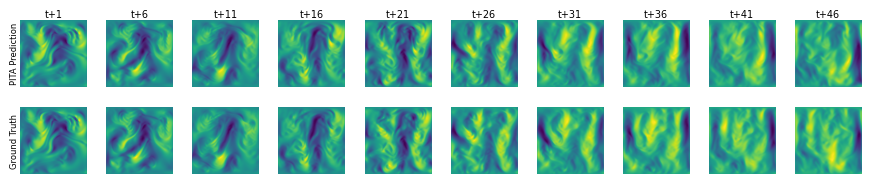

In [114]:
# Downsample timesteps by taking every 5th timestep
cmap_list = ["magma", "viridis", "plasma"]
cmap = cmap_list[1]
timestep_indices = list(range(0, 46, 5))  # Assuming timesteps are 1-indexed
downsampled_pred = pred[:, :, timestep_indices, :]
downsampled_yy = yy[:, :, timestep_indices, :]

# Total number of images and rows/cols
num_channels = downsampled_pred.shape[-1]  # Number of channels
num_images = len(timestep_indices)  # Total images after downsampling
images_per_row = 10  # Number of images per row
num_rows = (num_images + images_per_row - 1) // images_per_row * 2  # Rows for predictions and ground truths

# Create figure
fig, axes = plt.subplots(
    num_rows, images_per_row,
    figsize=(images_per_row * 1.1, num_rows),
    gridspec_kw={"wspace": 0.1, "hspace": 0.3}
)

# Plot images
image_idx = 0

for row in range(0, num_rows, 2):  # Every pair of rows is for one channel
    for col in range(images_per_row):
        if image_idx >= num_images:
            # Hide unused axes
            axes[row, col].axis('off')
            axes[row + 1, col].axis('off')
            continue

        # Plot prediction in the upper row
        ax_pred = axes[row, col]
        im_pred = ax_pred.imshow(downsampled_pred[:, :, image_idx, 1], cmap=cmap)
        ax_pred.axis('on')
        ax_pred.set_xticks([]) 
        ax_pred.set_yticks([]) 
        ax_pred.spines['top'].set_visible(False) 
        ax_pred.spines['right'].set_visible(False) 
        ax_pred.spines['bottom'].set_visible(False) 
        ax_pred.spines['left'].set_visible(False)

        # Plot ground truth in the lower row
        ax_yy = axes[row + 1, col]
        im_yy = ax_yy.imshow(downsampled_yy[:, :, image_idx, 1], cmap=cmap)
        ax_yy.axis('on')
        ax_yy.set_xticks([]) 
        ax_yy.set_yticks([]) 
        ax_yy.spines['top'].set_visible(False) 
        ax_yy.spines['right'].set_visible(False) 
        ax_yy.spines['bottom'].set_visible(False) 
        ax_yy.spines['left'].set_visible(False)

        image_idx += 1

# Add labels for each row
for row in range(0, num_rows, 2):
    axes[row, 0].set_ylabel("PITA Prediction", fontsize=6, labelpad=1)
    axes[row + 1, 0].set_ylabel("Ground Truth", fontsize=6, labelpad=1)

# Add titles for the first row of timesteps
# print(timestep_indices)
# print(images_per_row)
for col, t in enumerate(timestep_indices[:images_per_row]):
    
    axes[0, col].set_title(f't+{t+1}', fontsize=7, pad = 2)
    # if col <= 6:
    #     axes[2, col].set_title(f't+{t+50}', fontsize=7, pad = 2)

# Add titles for the first row of timesteps
# for col, t in enumerate(timestep_indices[:images_per_row]):
#     # Title for axes[0, col] (Prediction row)
#     axes[0, col].set_title(f' t+{t}', fontsize=7)

#     # Title for axes[1, col] (Ground truth row)
#     axes[1, col].set_title(f'GT t+{t}', fontsize=7)
# Adjust layout to prevent overlap
plt.tight_layout()

os.makedirs("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs", exist_ok=True)
# # Save figure

plt.savefig("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs/cond_new_batch6_1.pdf", dpi = 400,bbox_inches="tight")

/tmp/ipykernel_2695553/850667498.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


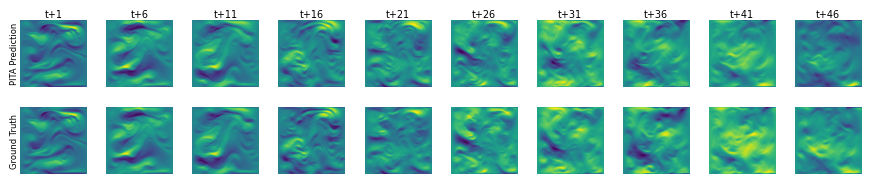

In [115]:
# Downsample timesteps by taking every 5th timestep
cmap_list = ["magma", "viridis", "plasma"]
cmap = cmap_list[1]
timestep_indices = list(range(0, 46, 5))  # Assuming timesteps are 1-indexed
downsampled_pred = pred[:, :, timestep_indices, :]
downsampled_yy = yy[:, :, timestep_indices, :]

# Total number of images and rows/cols
num_channels = downsampled_pred.shape[-1]  # Number of channels
num_images = len(timestep_indices)  # Total images after downsampling
images_per_row = 10  # Number of images per row
num_rows = (num_images + images_per_row - 1) // images_per_row * 2  # Rows for predictions and ground truths

# Create figure
fig, axes = plt.subplots(
    num_rows, images_per_row,
    figsize=(images_per_row * 1.1, num_rows),
    gridspec_kw={"wspace": 0.1, "hspace": 0.3}
)

# Plot images
image_idx = 0

for row in range(0, num_rows, 2):  # Every pair of rows is for one channel
    for col in range(images_per_row):
        if image_idx >= num_images:
            # Hide unused axes
            axes[row, col].axis('off')
            axes[row + 1, col].axis('off')
            continue

        # Plot prediction in the upper row
        ax_pred = axes[row, col]
        im_pred = ax_pred.imshow(downsampled_pred[:, :, image_idx, 2], cmap=cmap)
        ax_pred.axis('on')
        ax_pred.set_xticks([]) 
        ax_pred.set_yticks([]) 
        ax_pred.spines['top'].set_visible(False) 
        ax_pred.spines['right'].set_visible(False) 
        ax_pred.spines['bottom'].set_visible(False) 
        ax_pred.spines['left'].set_visible(False)

        # Plot ground truth in the lower row
        ax_yy = axes[row + 1, col]
        im_yy = ax_yy.imshow(downsampled_yy[:, :, image_idx, 2], cmap=cmap)
        ax_yy.axis('on')
        ax_yy.set_xticks([]) 
        ax_yy.set_yticks([]) 
        ax_yy.spines['top'].set_visible(False) 
        ax_yy.spines['right'].set_visible(False) 
        ax_yy.spines['bottom'].set_visible(False) 
        ax_yy.spines['left'].set_visible(False)

        image_idx += 1

# Add labels for each row
for row in range(0, num_rows, 2):
    axes[row, 0].set_ylabel("PITA Prediction", fontsize=6, labelpad=1)
    axes[row + 1, 0].set_ylabel("Ground Truth", fontsize=6, labelpad=1)

# Add titles for the first row of timesteps
# print(timestep_indices)
# print(images_per_row)
for col, t in enumerate(timestep_indices[:images_per_row]):
    
    axes[0, col].set_title(f't+{1+t}', fontsize=7, pad = 2)
   
plt.tight_layout()

# Create directory if it does not exist
os.makedirs("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs", exist_ok=True)
# # Save figure

plt.savefig("./logs_Auto_T_ar=1_use_full_False/S/0129_01_06_02ns2d_cond_pda_1_3100/figs/cond_new_batch6_2.pdf", dpi = 400,bbox_inches="tight")